In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split


In [360]:
housing_data = pd.read_csv("housing.csv")

In [361]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: >

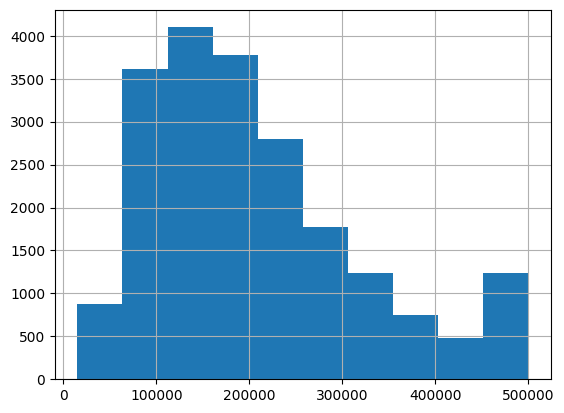

In [362]:
housing_data["median_house_value"].hist()

/home/kailash/mlzoomcamp/.mlzoomcamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kailash/mlzoomcamp/.mlzoomcamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

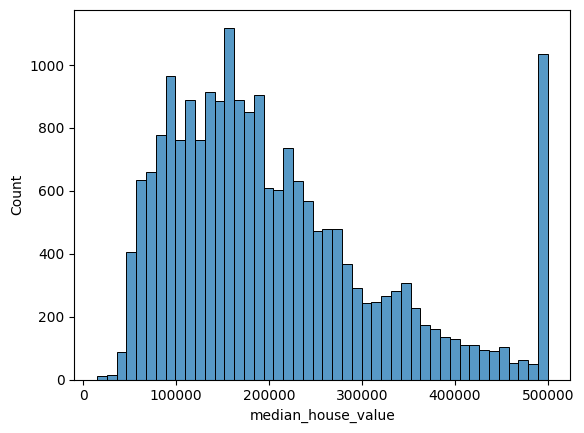

In [363]:
sns.histplot(x=housing_data["median_house_value"])

- Does have a long tail

In [364]:
housing_data['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [365]:
condition = (housing_data['ocean_proximity'] == '<1H OCEAN') | (housing_data['ocean_proximity'] == 'INLAND')


filtered_housing_data = housing_data[condition]

Question 1
There's one feature with missing values. What is it?

In [366]:
filtered_housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

 -  total_bedrooms

In [367]:
filtered_housing_data['total_bedrooms'].fillna(0, inplace=True)


/tmp/ipykernel_107534/1218990469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_housing_data['total_bedrooms'].fillna(0, inplace=True)


In [368]:
filtered_housing_data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Question 2
What's the median (50% percentile) for variable 'population'?

In [369]:
filtered_housing_data['population'].median()

1195.0

In [370]:
filtered_housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [371]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','median_house_value']

In [372]:
filtered_housing_data =filtered_housing_data[features]

     

- Question 3

    - We need to deal with missing values for the column from Q1.
    - We have two options: fill it with 0 or with the mean of this variable.
    - Try both options. For each, train a linear regression model without regularization using the code from the lessons.
    - For computing the mean, use the training only!
    - Use the validation dataset to evaluate the models and compare the RMSE of each option.
    - Round the RMSE scores to 2 decimal digits using round(score, 2)
    - Which option gives better RMSE?


In [373]:
filtered_housing_data["total_bedrooms"].mean()

535.8277554663097

In [374]:
filtered_housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [375]:
filtered_housing_data['total_bedrooms_impute_zero'] =filtered_housing_data['total_bedrooms'].fillna(value=0)

In [376]:
filtered_housing_data['total_bedrooms_impute_mean'] =filtered_housing_data['total_bedrooms'].fillna(value=535.82)

### shuffling and splitting the dataset

In [377]:
n = filtered_housing_data.shape[0]

In [378]:
test_split = int(n*0.2)
val_split = int(n*0.2)
train_split = n-(test_split+val_split)

In [379]:
train_split

9413

In [380]:
df_train = filtered_housing_data[:train_split]
df_val = filtered_housing_data[train_split:train_split+val_split]
df_test = filtered_housing_data[train_split+val_split:]

In [381]:
idx = np.arange(n)

In [382]:
np.random.seed(2)

In [383]:
np.random.shuffle(idx)

In [384]:
df_train = filtered_housing_data.iloc[idx[:train_split]]
df_val = filtered_housing_data.iloc[idx[train_split:train_split+val_split]]
df_test = filtered_housing_data.iloc[idx[train_split+val_split:]]

In [385]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedrooms_impute_zero,total_bedrooms_impute_mean
9728,-121.65,36.85,20.0,2606.0,424.0,1361.0,426.0,4.5787,245100.0,424.0,424.0
8523,-118.34,33.90,36.0,1158.0,219.0,628.0,253.0,4.7426,242700.0,219.0,219.0
15347,-117.28,33.28,13.0,6131.0,1040.0,4049.0,940.0,3.8156,150700.0,1040.0,1040.0
8910,-118.48,34.02,22.0,1249.0,483.0,1106.0,481.0,2.5261,375000.0,483.0,483.0
1001,-121.77,37.68,36.0,1687.0,372.0,950.0,372.0,3.5532,158400.0,372.0,372.0


In [386]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [387]:


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)



In [388]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)



In [389]:


del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']



### Normal form

In [390]:
df_train0= df_train.drop(columns=["total_bedrooms_impute_mean","total_bedrooms"])
df_val0 = df_val.drop(columns=["total_bedrooms_impute_mean","total_bedrooms"])
df_test0 = df_test.drop(columns=["total_bedrooms_impute_mean","total_bedrooms"])

In [391]:
df_train_array = df_train0.values  # Convert DataFrame to a numpy array

# Transpose and calculate the product
transpose_product = np.transpose(df_train_array) @ df_train_array

In [392]:
inverse = np.linalg.inv(transpose_product)

In [393]:
gradient = inverse @ np.transpose(df_train_array) @ np.array(y_train)

In [394]:
gradient

array([-1.47965281e-01, -1.83313287e-01,  2.81174484e-03, -5.35664614e-05,
       -1.47552764e-04,  5.59141802e-04,  1.96186922e-01,  2.43816101e-04])

In [395]:
predict = df_test0 @ gradient

In [396]:
import sklearn

In [397]:
sklearn.metrics.mean_squared_error(y_pred=predict,y_true=y_test)

0.11526478127667672

# sklearn training

In [398]:
from sklearn.linear_model import LinearRegression

In [399]:
lin_reg = LinearRegression()

### imputed zero

In [400]:
df_train2 = df_train.drop(columns=["total_bedrooms_impute_mean","total_bedrooms"])
df_val2 = df_val.drop(columns=["total_bedrooms_impute_mean","total_bedrooms"])
df_test2 = df_test.drop(columns=["total_bedrooms_impute_mean","total_bedrooms"])


In [401]:
lin_reg.fit(df_train2, y_train)
lin_reg.intercept_, lin_reg.coef_
predictions = lin_reg.predict(df_val2)
rmse1 = sklearn.metrics.mean_squared_error(y_pred=predictions,y_true=y_val)
print(f"RMSE SCORE WITH zero imputed : {rmse1}")

RMSE SCORE WITH zero imputed : 0.11453398544160234


### imputed mean

In [402]:
df_train3 = df_train.drop(columns=["total_bedrooms_impute_zero","total_bedrooms"])
df_val3 = df_val.drop(columns=["total_bedrooms_impute_zero","total_bedrooms"])
df_test3 = df_test.drop(columns=["total_bedrooms_impute_zero","total_bedrooms"])

lin_reg.fit(df_train3, y_train)
lin_reg.intercept_, lin_reg.coef_
predictions = lin_reg.predict(df_val3)
rmse2 = sklearn.metrics.mean_squared_error(y_pred=predictions,y_true=y_val)
print(f"RMSE SCORE WITH mean imputed : {rmse2}")

RMSE SCORE WITH mean imputed : 0.11453398544160234


- Question 4

    - Now let's train a regularized linear regression.
    - For this question, fill the NAs with 0.
    - Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
    - Use RMSE to evaluate the model on the validation dataset.
    - Round the RMSE scores to 2 decimal digits.
    - Which r gives the best RMSE?


In [403]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [404]:
ridge = Ridge()

In [405]:
param_grid = {'alpha': [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]}

In [406]:
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [407]:
grid_search.fit(df_train2, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 1e-06, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10]},
             scoring='neg_mean_squared_error')

In [408]:
best_alpha = grid_search.best_params_['alpha']

In [409]:
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(df_train2, y_train)


Ridge(alpha=0)

In [410]:
y_pred = best_ridge.predict(df_val2)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"The best alpha (r) is {best_alpha}")
print(f"RMSE on validation set: {rmse:.2f}")

The best alpha (r) is 0
RMSE on validation set: 0.34


Question 5

    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    Fill the missing values with 0 and train a model without regularization.
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    Round the result to 3 decimal digits (round(std, 3))


In [411]:
rmse_scores = []

In [412]:
dataset =filtered_housing_data.drop(columns=["total_bedrooms_impute_mean","total_bedrooms"])

In [413]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','population', 'households', 'median_income','total_bedrooms_impute_zero']

In [414]:
data = dataset[features]

In [415]:
target = np.log1p(dataset.median_house_value.values)

In [416]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seed_values:
    X_train, X_temp, y_train, y_temp = train_test_split(data, target, test_size=0.4, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)
    
    X_train.fillna(0, inplace=True)
    X_val.fillna(0, inplace=True)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    rmse = mean_squared_error(y_val, y_pred,squared=False)
    
    rmse_scores.append(rmse)


In [417]:
rmse_scores

[0.3369895160601144,
 0.33088847417395656,
 0.34378970555758825,
 0.3455487740304386,
 0.3304315436319269,
 0.3394347782068776,
 0.33682266307981945,
 0.32829623374808475,
 0.3376595817306712,
 0.34613513921000366]

In [418]:
std_deviation = np.std(rmse_scores)

In [419]:
std_deviation_rounded = round(std_deviation, 3)

In [420]:
std_deviation_rounded

0.006

Question 6

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?


In [421]:
X_train, X_temp, y_train, y_temp = train_test_split(data, target, test_size=0.4, random_state=9)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=9)


In [422]:
comb_test = pd.concat([X_val,X_test])

In [423]:
comb_target = np.concatenate((y_val,y_test),axis=0)

In [424]:
X_train.fillna(0, inplace=True)
comb_test.fillna(0, inplace=True)

In [425]:
model = Ridge(alpha=0.001)
model.fit(X_train, y_train)

y_pred = model.predict(comb_test)

rmse = mean_squared_error(comb_target, y_pred,squared=False)

rmse

0.34213031272244443